# Частина третя: Аналіз датасет c Kaggle.com

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

In [2]:
url = 'bestsellers_with_categories.csv'
table = pd.read_csv(url)

print(table.head())
print(table)

rows, columns = table.shape

print("Rows:", rows)
print("Columns:", columns)

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
                                                  Name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rul

- Про скільки книг зберігає дані датасет? Відповідь: 550

In [3]:
table.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

print(table.head())

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


## Первинне дослідження даних

- Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [4]:
na_counts = table.isna().sum()

print(na_counts)

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


- Чи є в якихось змінних пропуски? Відповідь: Ні

- Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [5]:
unique_genres = table['genre'].unique()

print(unique_genres)

['Non Fiction' 'Fiction']


- Які є унікальні жанри? Відповідь: Non Fiction, Fiction

- Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

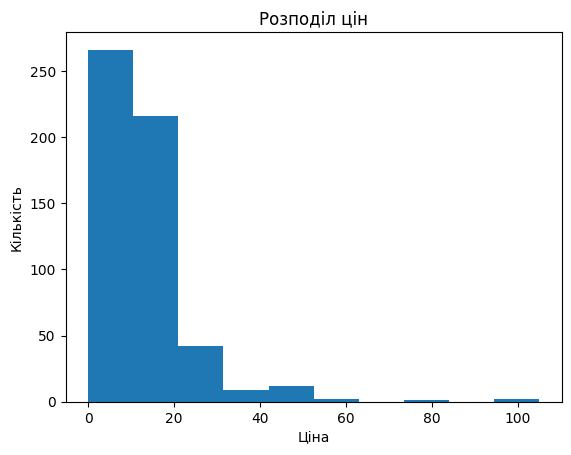

In [6]:
table['price'].plot(kind='hist', bins=10)
plt.xlabel('Ціна')
plt.ylabel('Кількість')
plt.title('Розподіл цін')
plt.show()

- Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [7]:
max_price = table['price'].max()
min_price = table['price'].min()
mean_price = table['price'].mean()
median_price = table['price'].median()

print("max_price:", max_price)
print("min_price:", min_price)
print("mean_price:", mean_price)
print("median_price:", median_price)

max_price: 105
min_price: 0
mean_price: 13.1
median_price: 11.0


- Максимальна ціна? Відповідь: 105
- Мінімальна ціна? Відповідь: 0
- Середня ціна? Відповідь: 13.1
- Медіанна ціна? Відповідь: 11

## Пошук та сортування даних

In [8]:
max_rating = table['user_rating'].max()

print(max_rating)

4.9


- Який рейтинг у датасеті найвищий? Відповідь: 4.9

In [9]:
books_with_max_rating = table[table['user_rating'] == max_rating]
count_books_with_max_rating = books_with_max_rating.shape[0]

print(count_books_with_max_rating)

52


- Скільки книг мають такий рейтинг? Відповідь: 52

In [10]:
max_reviews = table['reviews'].max()
book_with_max_reviews = table[table['reviews'] == max_reviews]

book_title = book_with_max_reviews['name'].values[0]
book_author = book_with_max_reviews['author'].values[0]

print(book_title)
print(book_author)

Where the Crawdads Sing
Delia Owens


- Яка книга має найбільше відгуків? Відповідь: 'Where the Crawdads Sing' Delia Owens

In [11]:
books_2015 = table[table['year'] == 2015]
max_price_2015 = books_2015['price'].max()

book_with_max_price_2015 = books_2015[books_2015['price'] == max_price_2015]

book_title = book_with_max_price_2015['name'].values[0]
book_author = book_with_max_price_2015['author'].values[0]

print(book_title)
print(book_author)

Publication Manual of the American Psychological Association, 6th Edition
American Psychological Association


- З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: 'Publication Manual of the American Psychological Association, 6th Edition', American Psychological Association

In [12]:
fiction_2010 = table[(table['genre'] == 'Fiction') & (table['year'] == 2010)]
count_fiction_2010 = fiction_2010.shape[0]

print(count_fiction_2010)

20


- Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

In [13]:
books_4_9_2010_2011 = table[(table['user_rating'] == 4.9) & (table['year'].isin([2010, 2011]))]
count_books_4_9_2010_2011 = books_4_9_2010_2011.shape[0]

print(count_books_4_9_2010_2011)

1


- Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:

- давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values)

In [14]:
books_2015_under_8 = table[(table['year'] == 2015) & (table['price'] < 8)]
sorted_books_2015_under_8 = books_2015_under_8.sort_values('price')

print(sorted_books_2015_under_8)

                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                                   Love You Forever       Rob

In [15]:
last_book = sorted_books_2015_under_8.tail(1)

last_book_title = last_book['name'].values[0]
last_book_author = last_book['author'].values[0]

print(last_book_title)
print(last_book_author)

Old School (Diary of a Wimpy Kid #10)
Jeff Kinney


- Яка книга остання у відсортованому списку? Відповідь: 'Old School (Diary of a Wimpy Kid #10)' Jeff Kinney

## Агрегування даних та з'єднання таблиц

- давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [16]:
genre_prices = table.groupby('genre')['price'].agg(['min', 'max'])

print(genre_prices)

             min  max
genre                
Fiction        0   82
Non Fiction    0  105


- Максимальна ціна для жанру Fiction: 82

- Мінімальна ціна для жанру Fiction: 0

- Максимальна ціна для жанру Non Fiction: 105

- Мінімальна ціна для жанру Non Fiction: 0

- Cтворіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [17]:
author_counts = table.groupby('author').agg(count=('name', 'count'))
author_counts = author_counts.reset_index()
author_counts.columns = ['author', 'count']

print(author_counts.head())

rows, columns = table.shape

print("Rows:", rows)
print("Columns:", columns)

                       author  count
0            Abraham Verghese      2
1              Adam Gasiewski      1
2               Adam Mansbach      1
3                   Adir Levy      1
4  Admiral William H. McRaven      1
Rows: 550
Columns: 7


- Якої розмірності вийшла таблиця? Відповідь: 248 rows x 2 columns

In [18]:
author_index = author_counts['count'].idxmax()
author = author_counts['author'][author_index]

print(author)

Jeff Kinney


- Який автор має найбільше книг? Відповідь: Jeff Kinney

In [19]:
books_count = author_counts['count'][author_index]

print(books_count)

12


- Скільки книг цього автора? Відповідь: 12

- Створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [20]:
author_ratings = table.groupby('author')['user_rating'].agg(avg_rating='mean')
author_ratings = author_ratings.reset_index()
author_ratings.columns = ['author', 'avg_rating']

print(author_ratings)

                         author  avg_rating
0              Abraham Verghese    4.600000
1                Adam Gasiewski    4.400000
2                 Adam Mansbach    4.800000
3                     Adir Levy    4.800000
4    Admiral William H. McRaven    4.700000
..                          ...         ...
243             Walter Isaacson    4.566667
244               William Davis    4.400000
245            William P. Young    4.600000
246            Wizards RPG Team    4.800000
247                Zhi Gang Sha    4.600000

[248 rows x 2 columns]


In [21]:
author_index = author_ratings['avg_rating'].idxmin()
author = author_ratings['author'][author_index]

print(author)

Donna Tartt


- У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt

In [22]:
author_avg_rating = author_ratings['avg_rating'][author_index]

print(author_avg_rating)

3.9


- Який у цього автора середній рейтинг? Відповідь: 3.9

- З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [23]:
combined_df = pd.concat([author_counts, author_ratings], axis=1)
combined_df = combined_df.loc[:,~combined_df.columns.duplicated()]

print(combined_df)

                         author  count  avg_rating
0              Abraham Verghese      2    4.600000
1                Adam Gasiewski      1    4.400000
2                 Adam Mansbach      1    4.800000
3                     Adir Levy      1    4.800000
4    Admiral William H. McRaven      1    4.700000
..                          ...    ...         ...
243             Walter Isaacson      3    4.566667
244               William Davis      2    4.400000
245            William P. Young      2    4.600000
246            Wizards RPG Team      3    4.800000
247                Zhi Gang Sha      2    4.600000

[248 rows x 3 columns]


- Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [24]:
sorted_df = combined_df.sort_values(by=['count', 'avg_rating'], ascending=True)

print(sorted_df)

                                 author  count  avg_rating
171                      Muriel Barbery      1    4.000000
43                         Chris Cleave      1    4.100000
109                   Ian K. Smith M.D.      1    4.100000
186                        Pierre Dukan      1    4.100000
81                     Elizabeth Strout      1    4.200000
..                                  ...    ...         ...
11   American Psychological Association     10    4.500000
226                     Suzanne Collins     11    4.663636
92                         Gary Chapman     11    4.736364
197                        Rick Riordan     11    4.772727
120                         Jeff Kinney     12    4.800000

[248 rows x 3 columns]


In [25]:
first_author = sorted_df.iloc[0]['author']

print(first_author)

Muriel Barbery


- Який автор перший у списку? Відповідь: Muriel Barbery

### Chart 1
Матриця кореляції між числовими змінними

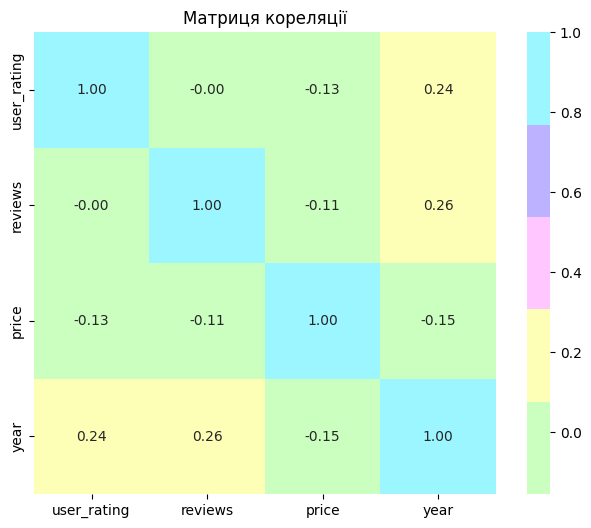

In [26]:
correlation_matrix = table.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=['#caffbf', '#fdffb6', '#ffc6ff', '#bdb2ff', '#9bf6ff'], fmt=".2f", square=True)
plt.title('Матриця кореляції')
plt.show()

### Chart 2
Розподіл цін на книги для кожного жанру

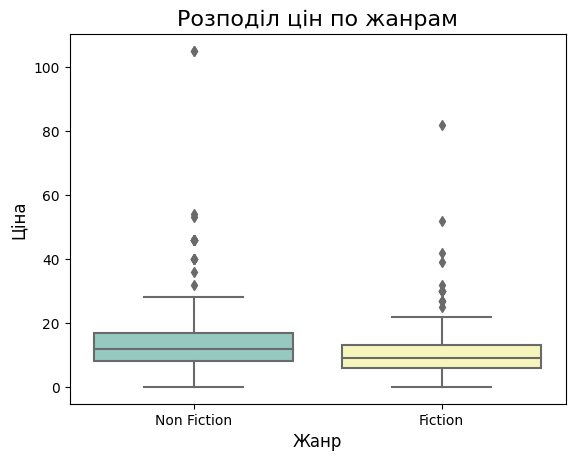

In [27]:
sns.boxplot(x='genre', y='price', data=table, palette='Set3')
plt.title('Розподіл цін по жанрам', fontsize=16)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Ціна', fontsize=12)
plt.show()

### Chart 3
Середня оцінка користувачів за роками

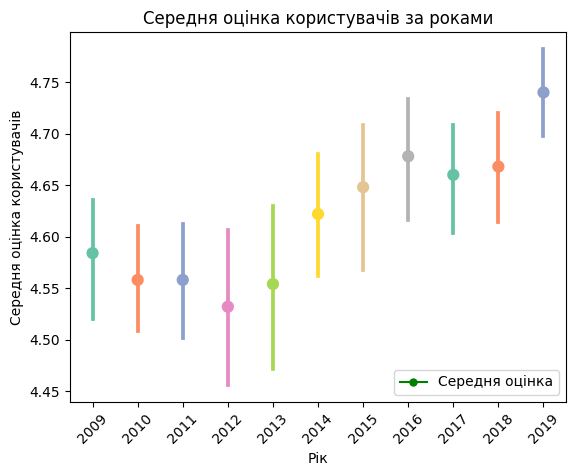

In [28]:
sns.pointplot(x='year', y='user_rating', data=table, palette='Set2')
plt.title('Середня оцінка користувачів за роками')
plt.xlabel('Рік')
plt.ylabel('Середня оцінка користувачів')
plt.xticks(rotation=45)

line = mlines.Line2D([], [], color='green', marker='o', markersize=5, label='Середня оцінка')
plt.legend(handles=[line], loc='lower right')

plt.show()

### Chart 4
Щільність розподілу оцінок користувачів 

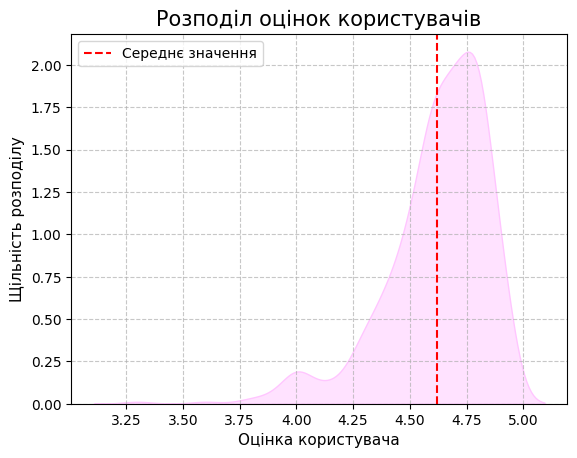

In [29]:
sns.kdeplot(data=table['user_rating'], fill=True, color='#ffc6ff', alpha=0.5)
plt.title('Розподіл оцінок користувачів', fontsize=15)
plt.xlabel('Оцінка користувача', fontsize=11)
plt.ylabel('Щільність розподілу', fontsize=11)

plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(x=table['user_rating'].mean(), color='red', linestyle='--', label='Середнє значення')
plt.legend()

plt.show()

### Chart 5
Лінійна регресія між кількістю відгуків та ціною

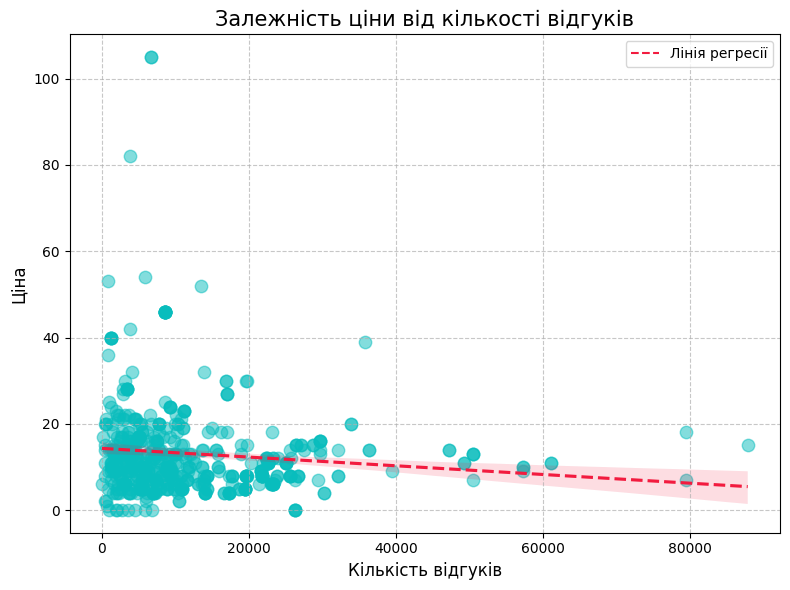

In [30]:
plt.figure(figsize=(8, 6))

sns.regplot(x='reviews', y='price', data=table, scatter_kws={'s': 80, 'alpha': 0.5, 'color': '#08bdbd'}, line_kws={'color': '#f21b3f', 'linestyle': '--'})
plt.title('Залежність ціни від кількості відгуків', fontsize=15)
plt.xlabel('Кількість відгуків', fontsize=12)
plt.ylabel('Ціна', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
line = mlines.Line2D([], [], color='#f21b3f', linestyle='--', label='Лінія регресії')
plt.legend(handles=[line])

plt.tight_layout()

plt.show()